# Assignmnet 3

Ali Karimi UCID:30225064

## Excercise 3

### Part (a)

In [107]:
# Importing useful functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# Load the Hubble data from the provided file
data = pd.read_csv('/hubbleHumasonData.dat', delim_whitespace=True, header=None)
data.columns = ['Nebula', 'Velocity', 'Num_Velocities', 'Magnitude']

# Extract the relevant columns
v = data['Velocity'].values
m = data['Magnitude'].values
v=v[1:].astype(float)
m=m[1:].astype(float)

<ipython-input-108-de18e951f22f>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/hubbleHumasonData.dat', delim_whitespace=True, header=None)


In [109]:
# Parameters for MCMC
initial_a = 0.2  # Initial guess for a
initial_b = 0.9  # Initial guess for b
iterations = 10000  # Number of iterations
proposal_width_a = 0.2  # Proposal width for a
proposal_width_b = 0.5 # Proposal width for b


In [110]:
# Define the log-likelihood function
def log_likelihood(a, b, v, m):
    model = a + b * m
    return -0.5 * np.sum((np.log(v) - model) ** 2)

In [111]:
# Define the MCMC Metropolis-Hastings function for a and b
def metropolis_hastings(v,m, initial_a, initial_b, iterations, proposal_width_a, proposal_width_b):
    a_samples = []
    b_samples = []

    a_current = initial_a
    b_current = initial_b
    log_likelihood_current = log_likelihood(a_current, b_current, v, m)

    acceptances = 0  # To track acceptance rate

    for _ in range(iterations):
        # Propose new values for a and b
        a_proposed = np.random.uniform(a_current - proposal_width_a/2, a_current + proposal_width_a/2)
        b_proposed = np.random.uniform(b_current - proposal_width_b/2, b_current + proposal_width_b/2)

        # Calculate the log-likelihood for the proposed values
        log_likelihood_proposed = log_likelihood(a_proposed,b_proposed,v,m)

        # Calculate the acceptance probability in terms of log-likelihood
        log_acceptance_ratio = log_likelihood_proposed - log_likelihood_current
        acceptance_ratio = np.exp(log_acceptance_ratio)

        # Accept or reject the proposed values
        if np.random.rand() < min(1, acceptance_ratio):
            a_current = a_proposed
            b_current = b_proposed
            log_likelihood_current = log_likelihood_proposed
            acceptances += 1  # Count accepted proposals

        # Store the current a and b values
        a_samples.append(a_current)
        b_samples.append(b_current)

    acceptance_rate = acceptances / iterations
    return np.array(a_samples), np.array(b_samples), acceptance_rate

# Run MCMC to estimate a and b
a_samples, b_samples, acceptance_rate = metropolis_hastings(
    v,m, initial_a, initial_b, iterations, proposal_width_a, proposal_width_b
)


### Part (b)

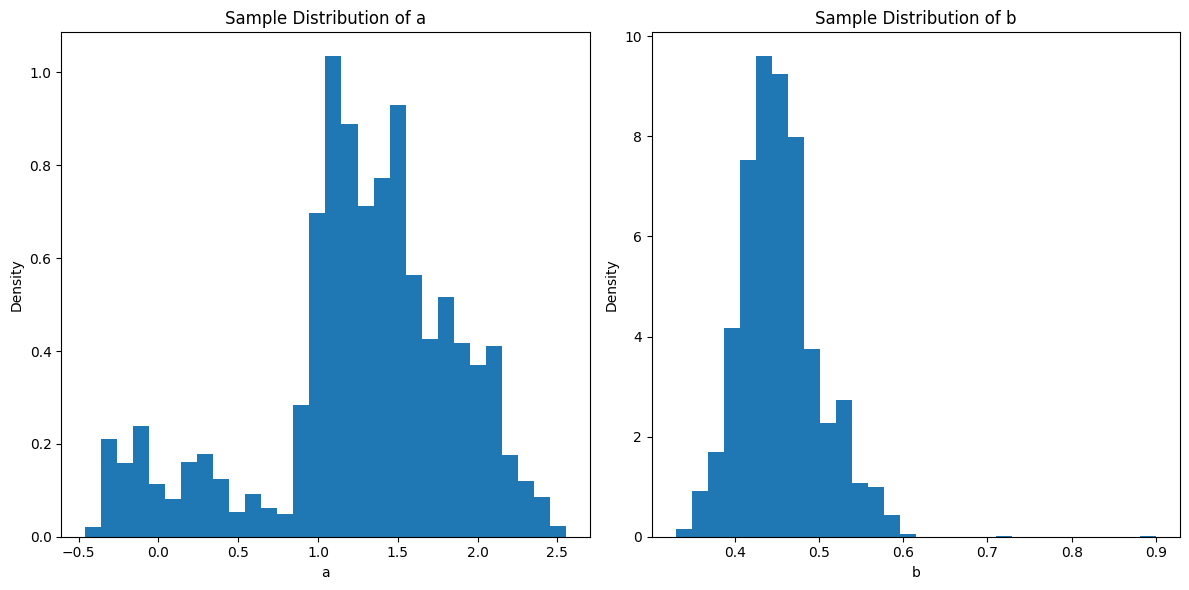

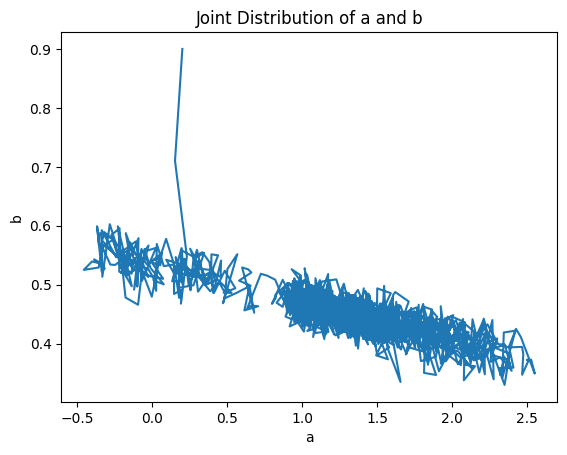

Acceptance rate: 0.1298
Mean of a: 1.2622695910484694
Standard deviation of a: 0.6164130157331474
95% credible interval for a: [-0.23076304  2.23369963]
Mean of b: 0.4532948880393571
Standard deviation of b: 0.045594768913783564
95% credible interval for b: [0.37234612 0.55956505]


In [112]:
# Plot the sample distributions of a and b
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(a_samples, bins=30, density=True)
plt.xlabel('a')
plt.ylabel('Density')
plt.title('Sample Distribution of a')

plt.subplot(1, 2, 2)
plt.hist(b_samples, bins=30, density=True)
plt.xlabel('b')
plt.ylabel('Density')
plt.title('Sample Distribution of b')

plt.tight_layout()
plt.show()
plt.plot(a_samples,b_samples)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Joint Distribution of a and b')
plt.show()
a_cred_int = np.percentile(a_samples, [2.5, 97.5])
b_cred_int = np.percentile(b_samples, [2.5, 97.5])

# Analyze the results by printing summary statistics
print(f"Acceptance rate: {acceptance_rate:.4f}")
print(f"Mean of a: {np.mean(a_samples)}")
print(f"Standard deviation of a: {np.std(a_samples)}")
print(f"95% credible interval for a: {a_cred_int}")
print(f"Mean of b: {np.mean(b_samples)}")
print(f"Standard deviation of b: {np.std(b_samples)}")
print(f"95% credible interval for b: {b_cred_int}")


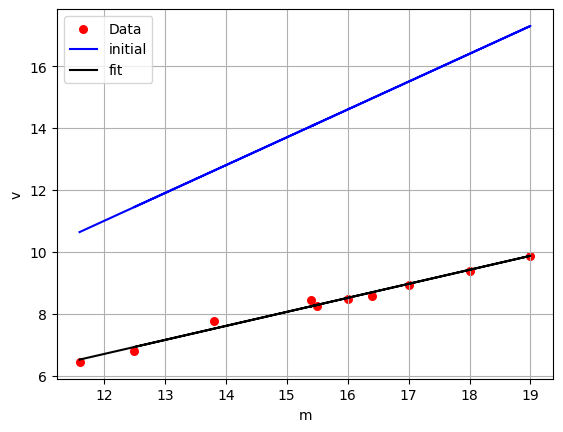

In [113]:
# Plot the different models
def model(a,b,m):
    return a+ b * m
y1 = [model(0.2,0.9,m[i]) for i in range(len(m))]
y2 = [model(np.mean(a_samples),np.mean(b_samples),m[j]) for j in range(len(m))]
plt.scatter(m,np.log(v), color='red', label='Data',s=30)
plt.plot(m,y1,'b',label='initial')
plt.plot(m,y2,'k',label='fit')
plt.xlabel('m')
plt.ylabel('v')
plt.grid(True)
plt.legend()
plt.show()

In [114]:
#Calculating R^2 and X^2
y=np.log(v)
y_pred=y2
y_mean=np.mean(y)
sst = np.sum((y - y_mean) ** 2)
ssr = np.sum((y - y_pred) ** 2)
r2 = 1 - (ssr / sst)
print(f"R^2: {r2}")

R^2: 0.9854244011067774


### Summary of Data Analysis Results

#### Posterior Distributions
- **Parameter \( b \)**: The distribution is approximately normal around its mean, indicating proper convergence of the MCMC chain. The narrow distribution suggests high confidence in the parameter estimate.
- **Parameter \( a \)**: The distribution shows multiple peaks, which may indicate issues with convergence or inappropriate initial parameter choices. The joint distribution of \( a \) and \( b \) shows that the uncertainty in \( a \) is larger than in \( b \).


#### Best-Fitting Line
- The \( R^2 \) score is 0.98, indicating an excellent fit of the model to the data.

#### Positivity of \( b \)
- The positive slope \( b \) implies that galaxies with higher apparent magnitudes (larger \( m \)) are receding faster. This is consistent with Hubble's Law, supporting the validity of the model.
